In [1]:
import pandas as pd
import numpy as np

ds = pd.read_excel(r"C:/Users/18573/Downloads/INFO 6105 DS EMT/Assignment/Assignment4/boston.xls")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [2]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [3]:
#perfomed scaling on entire dataset

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler();
X = scaler.fit_transform(ds)

In [4]:
#Scaled dataset

dss=pd.DataFrame(X,columns=ds.columns)

In [5]:
dss.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [6]:
# Compute the within-cluster sum of squares (WCSS) for a range of values of k
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


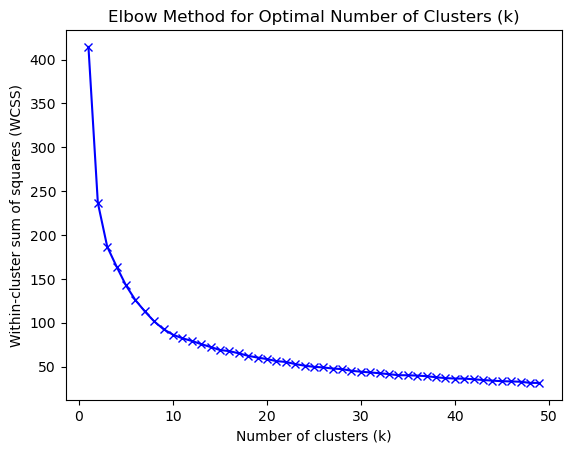

In [7]:
# Plot the WCSS as a function of k
import matplotlib.pyplot as plt

plt.plot(range(1, 50), wcss, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Elbow Method for Optimal Number of Clusters (k)")
plt.show()

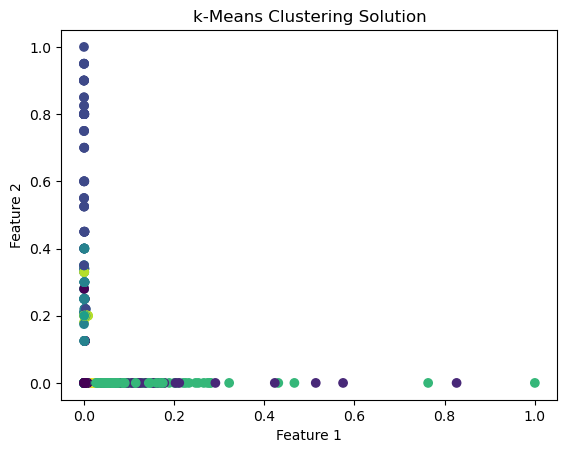

In [8]:
#k=10 corresponds to elbow-point, hence k=10 is the best k-value
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Get the cluster labels for each observation
labels = kmeans.labels_

# Plot the observations in the feature space, colored by their cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-Means Clustering Solution")
plt.show()

In [9]:
# Compute the silhouette scores for each observation
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(X, kmeans.labels_)
sample_silhouette_values = silhouette_samples(X, kmeans.labels_)


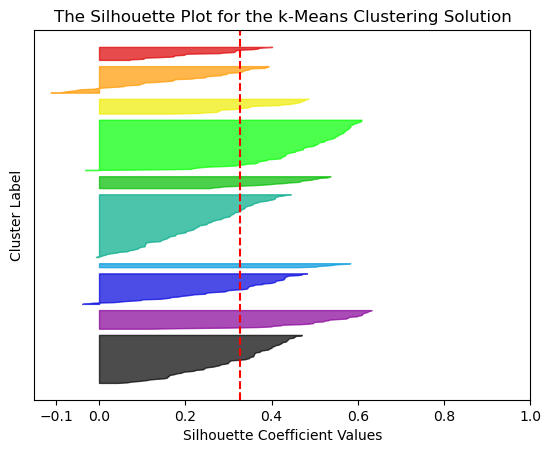

In [10]:
y_lower = 10
for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 10)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
    
plt.title("The Silhouette Plot for the k-Means Clustering Solution")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()